In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

# import os
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [2]:
audio_files=glob(r"C:\Users\Admin\Downloads\public_dataset_v3\wav file/*.wav")


In [3]:
# # Different approach test
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt

# # Specify the path to your audio file
# filename = audio_files[12]

# # Load the audio file
# data, sample_rate = librosa.load(filename, sr=None)

# # Plot waveform
# plt.figure(figsize=(14, 5))
# librosa.display.waveshow(data, sr=sample_rate)
# plt.title('Waveform')
# plt.xlabel('Time (seconds)')
# plt.ylabel('Amplitude')
# plt.show()


In [4]:
#play audio file of coughing
ipd.Audio(audio_files[12])

In [5]:
audio, sr = librosa.load(audio_files[12])
print(f'audio:{audio[:10]}')
print(f'shape audio:{audio.shape}')
print(f'sr:{sr}')

audio:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape audio:(215649,)
sr:22050


<Axes: title={'center': 'raw audio example'}>

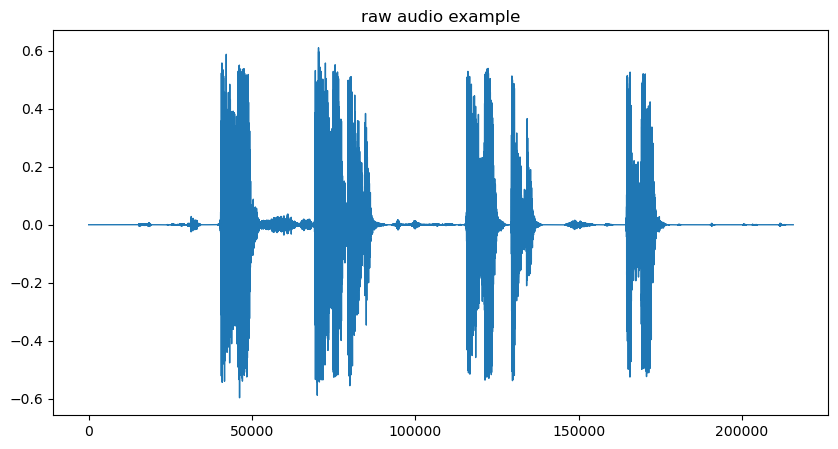

In [6]:
pd.Series(audio).plot(figsize=(10,5),lw=1,title="raw audio example")

<Axes: title={'center': 'raw trimmed audio example'}>

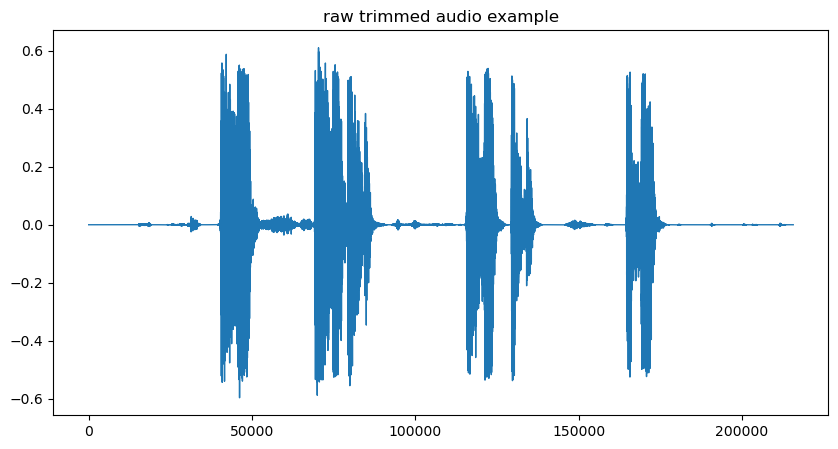

In [7]:
audio_trimmed =librosa.effects.trim(audio,top_db=20)
pd.Series(audio).plot(figsize=(10,5),lw=1,title="raw trimmed audio example")

In [8]:
D=librosa.stft(audio)
sound_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
sound_db.shape

(1025, 422)

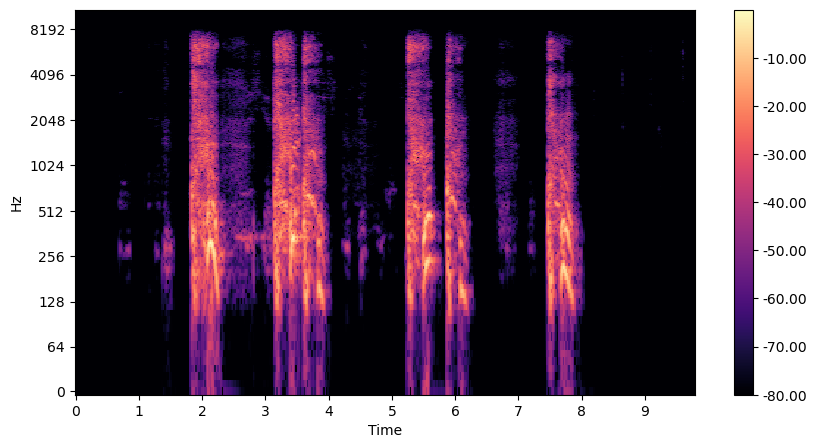

In [9]:
fig,ax=plt.subplots(figsize=(10,5))
img =librosa.display.specshow(sound_db,x_axis='time',y_axis='log',ax=ax)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

(128, 422)


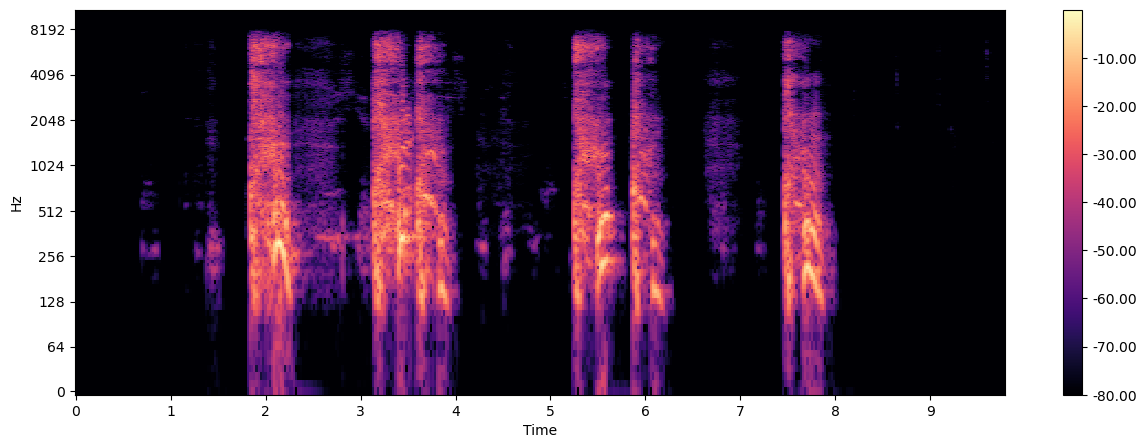

In [10]:
S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
sound_db_mel=librosa.amplitude_to_db(np.abs(D),ref=np.max)
print(S.shape)

fig,ax=plt.subplots(figsize=(15,5))
img =librosa.display.specshow(sound_db_mel,x_axis='time',y_axis='log',ax=ax)
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [11]:
sound_db_mel
print(len(sound_db_mel))

1025


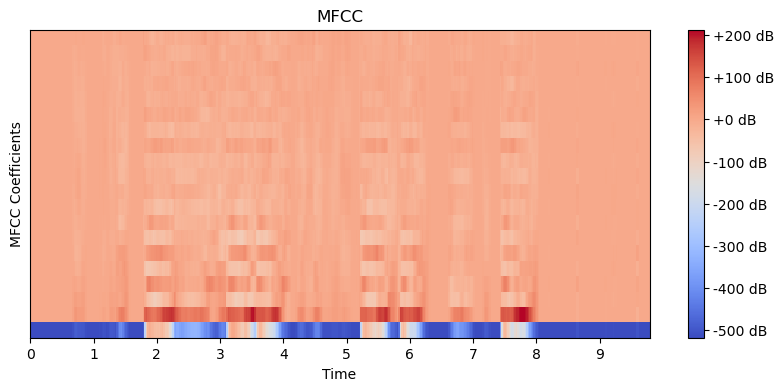

In [12]:
mfccs = librosa.feature.mfcc(y=audio, sr=sr)

# Display the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

In [13]:
# import os
# import glob
# import librosa
# import librosa.display
# import numpy as np
# import matplotlib.pyplot as plt

# dataset_path = r"C:\Users\Admin\Downloads\public_dataset_v3\wav file\*.wav"

# # Create an empty list to store the computed MFCCs
# mfccs_list = []

# # Retrieve all .wav file paths in the dataset directory
# file_paths = glob.glob(dataset_path)

# # Iterate over each audio file path
# for file_path in file_paths:
#     # Load the audio file
#     audio, sample_rate = librosa.load(file_path, sr=None)
    
#     # Compute MFCCs
#     mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate)
    
#     # Append the MFCCs to the list
#     mfccs_list.append(mfccs)

# # Concatenate the MFCCs along the time axis
# combined_mfccs = np.concatenate(mfccs_list, axis=1)

# # Display the combined MFCCs
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(combined_mfccs, x_axis='time')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Combined MFCC')
# plt.xlabel('Time')
# plt.ylabel('MFCC Coefficients')
# plt.show()


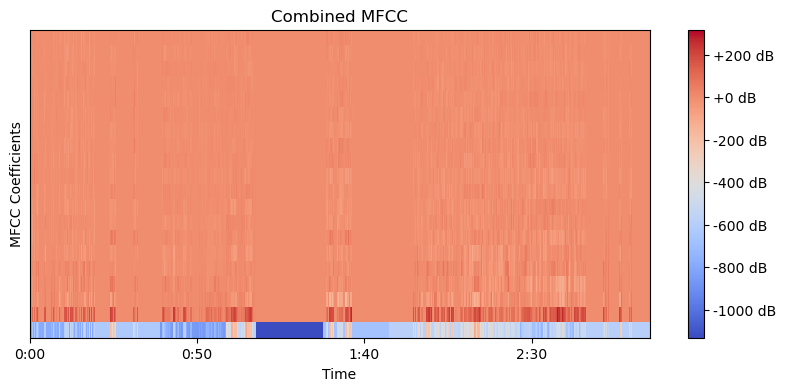

In [17]:
dataset_path = r"C:\Users\Admin\Downloads\public_dataset_v3\wav file\*.wav"
import glob
# Create an empty list to store the computed MFCCs
mfccs_list = []

# Retrieve all .wav file paths in the dataset directory
file_paths = glob.glob(dataset_path)

# Select a portion of the files from the dataset
portion_of_files = file_paths[:10]  # Change the number to select a different portion

# Iterate over each selected audio file path
for file_path in portion_of_files:
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, sr=None)
    
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate)
    
    # Append the MFCCs to the list
    mfccs_list.append(mfccs)

# Concatenate the MFCCs along the time axis
combined_mfccs = np.concatenate(mfccs_list, axis=1)

# Plot the combined MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(combined_mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Combined MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()


In [18]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming mfccs_list contains the MFCCs

# Find the maximum length of MFCCs in the list
max_length = max(mfccs.shape[1] for mfccs in mfccs_list)

# Pad or truncate the MFCCs to the maximum length
padded_mfccs = []
for mfccs in mfccs_list:
    num_mfccs = mfccs.shape[0]
    if mfccs.shape[1] < max_length:
        # Pad with zeros to match the maximum length
        pad_width = ((0, 0), (0, max_length - mfccs.shape[1]))
        mfccs = np.pad(mfccs, pad_width, mode='constant')
    elif mfccs.shape[1] > max_length:
        # Truncate to match the maximum length
        mfccs = mfccs[:, :max_length]
    padded_mfccs.append(mfccs)

# Convert the list of padded MFCCs to a single numpy array
X = np.array(padded_mfccs)

# Reshape the MFCCs to have a 2D shape
X = X.reshape(X.shape[0], -1)

# Create a KMeans object
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the MFCCs
kmeans.fit(X)

# Get the cluster labels assigned by the model
cluster_labels = kmeans.labels_

# Now you have cluster labels for each MFCC, which can be used for analysis or further tasks


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


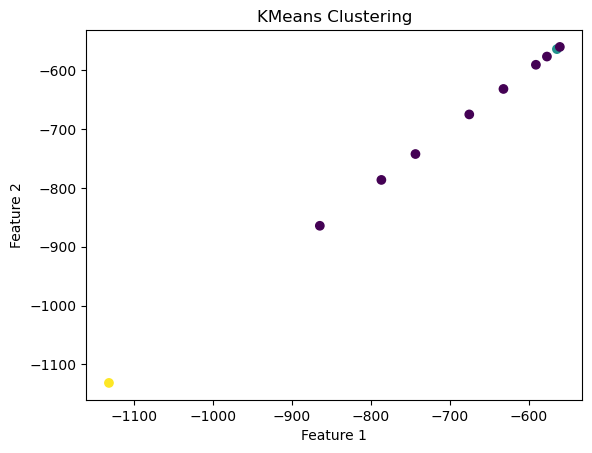

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')

# Show the plot
plt.show()

In [ ]:
# import autosklearn.classification
# import sklearn.model_selection

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state=42)

# # Create and fit the AutoSklearnClassifier
# automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=3600)  # Set the time limit for AutoSklearn
# automl.fit(X_train, y_train)

# # Evaluate the best model found by AutoSklearn on the test set
# y_pred = automl.predict(X_test)
# accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
# print("Accuracy: ", accuracy)


In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Load your dataset into H2O
data = h2o.import_file(r"C:\Users\Admin\Downloads\public_dataset_v3\coughvid_20211012\metadata_compiled.csv")

# Split the data into training and testing sets
train, test = data.split_frame(ratios=[0.8], seed=42)

# Specify the features and target column
x = data.columns[:-1]
y = data.columns[-1]

# Train the AutoML model
automl = H2OAutoML(max_models=10, seed=42)
automl.train(x=x, y=y, training_frame=train)

# View the leaderboard
leaderboard = automl.leaderboard
print(leaderboard)

# Make predictions on the test set
predictions = automl.predict(test)
print(predictions)

# Shutdown H2O
h2o.shutdown()


In [21]:
metadata_df = pd.read_csv(r"C:\Users\Admin\Downloads\public_dataset_v3\coughvid_20211012\metadata_compiled.csv")

metadata_df.head(10)

,Unnamed: 0,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,00098cdb-4da1-4aa7-825a-4f1b9abc214b,2021-01-22T22:08:06.742577+00:00,0.1133,47.4,9.4,66.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,NaN,NaN,21.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,00196ba6-0087-484b-a104-3e8884599596,2021-05-28T15:47:24.337832+00:00,0.3079,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,40.6,-3.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,001d8e33-a4af-4edb-98ba-b03f891d9a6c,2020-05-13T01:27:42.552773+00:00,0.0306,13.8,-89.6,NaN,female,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


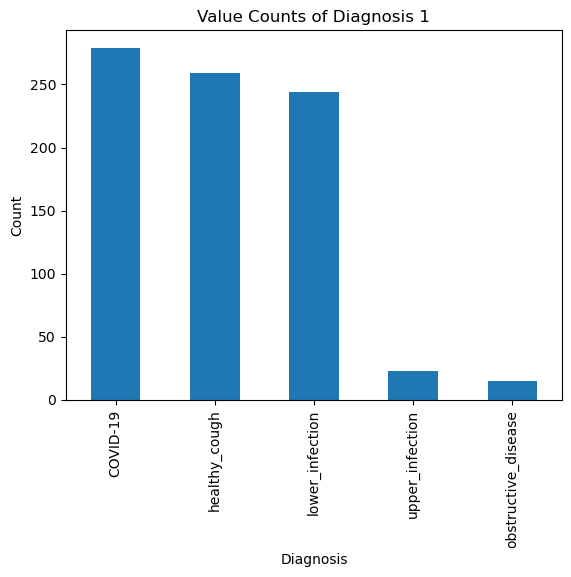

In [24]:
metadata_df['diagnosis_1'].value_counts()

import matplotlib.pyplot as plt

diagnosis_1_counts = metadata_df['diagnosis_1'].value_counts()

# Plotting the value counts as a bar graph
diagnosis_1_counts.plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Value Counts of Diagnosis 1')

# Displaying the plot
plt.show()

In [50]:
selected_columns = ['uuid', 'diagnosis_1'] #'diagnosis_2', 'diagnosis_3', 'diagnosis_4']
dataset = metadata_df[selected_columns].copy()
dataset.dropna(inplace=True)
dataset

,uuid,diagnosis_1
51,006d8d1c-2bf6-46a6-8ef2-1823898a4733,healthy_cough
154,01208e5c-5338-4f1b-b8c6-41c049e40d90,lower_infection
186,01567151-7bb2-45ee-9aa8-a1332b5941ea,COVID-19
212,018b40a1-c109-459a-9e31-86cbd2cb3918,lower_infection
266,01ff40e8-63e6-4570-a463-9778ea30cad7,healthy_cough
...,...,...
34290,fed255ec-4829-4f4a-b22d-9bb23f2dd89f,COVID-19
34319,ff1234d7-7837-4ba7-842f-99fdc916baa9,lower_infection
34355,ff5f97db-9b64-4e35-afe8-af463d5c2c60,lower_infection
34380,ff8bfcc9-3df2-4752-8280-63f023fba31c,COVID-19


In [51]:
a=list(dataset['uuid'])
print(len(a))

820


In [52]:
import shutil
import os

source_folder = r"C:\Users\Admin\Downloads\public_dataset_v3\wav file"
destination_folder = r"C:\Users\Admin\Downloads\public_dataset_v3\diagnosis1234_wav file clean" 
# List of elements to compare with file names
elements_to_compare = a

# Iterate over the files in the source folder
for file_name in os.listdir(source_folder):
    # Check if the file name matches any element in the list
    if any(element in file_name for element in elements_to_compare):
        # Build the source and destination file paths
        source_file_path = os.path.join(source_folder, file_name)
        destination_file_path = os.path.join(destination_folder, file_name)
        
        # Copy the file to the destination folder
        shutil.copy(source_file_path, destination_file_path)
print("complete")


complete


In [53]:
labels = dataset['diagnosis_1'].tolist()
print(labels)

['healthy_cough', 'lower_infection', 'COVID-19', 'lower_infection', 'healthy_cough', 'healthy_cough', 'COVID-19', 'healthy_cough', 'healthy_cough', 'healthy_cough', 'lower_infection', 'COVID-19', 'healthy_cough', 'lower_infection', 'COVID-19', 'COVID-19', 'lower_infection', 'healthy_cough', 'healthy_cough', 'healthy_cough', 'healthy_cough', 'lower_infection', 'obstructive_disease', 'COVID-19', 'COVID-19', 'lower_infection', 'COVID-19', 'COVID-19', 'lower_infection', 'lower_infection', 'healthy_cough', 'COVID-19', 'COVID-19', 'lower_infection', 'COVID-19', 'lower_infection', 'lower_infection', 'lower_infection', 'lower_infection', 'lower_infection', 'healthy_cough', 'COVID-19', 'lower_infection', 'lower_infection', 'lower_infection', 'lower_infection', 'COVID-19', 'lower_infection', 'COVID-19', 'lower_infection', 'healthy_cough', 'lower_infection', 'healthy_cough', 'healthy_cough', 'lower_infection', 'lower_infection', 'lower_infection', 'COVID-19', 'healthy_cough', 'lower_infection', '

In [55]:
import os
import pandas as pd

# Directory where the files are located
directory = destination_folder

# Create a list to store the matched files
matched_files = []

# Iterate over the files in the directory
for file_name in os.listdir(directory):
    # Extract the UUID from the file name
    uuid = os.path.splitext(file_name)[0]

    # Check if the UUID exists in the metadata DataFrame
    if uuid in dataset['uuid'].values:
        matched_files.append(file_name)

# Retrieve the labels for the matched files
labels = []
for file_name in matched_files:
    # Extract the UUID from the file name
    uuid = os.path.splitext(file_name)[0]

    # Find the corresponding label in the metadata DataFrame
    label = dataset.loc[dataset['uuid'] == uuid, 'diagnosis_1'].iloc[0]
    labels.append(label)

# Print the matched files and their corresponding labels
print("Matched Files and Labels:")
for file_name, label in zip(matched_files, labels):
    print(f"File: {file_name}, Label: {label}")




Matched Files and Labels:
File: 006d8d1c-2bf6-46a6-8ef2-1823898a4733.wav, Label: healthy_cough
File: 01208e5c-5338-4f1b-b8c6-41c049e40d90.wav, Label: lower_infection
File: 01567151-7bb2-45ee-9aa8-a1332b5941ea.wav, Label: COVID-19
File: 018b40a1-c109-459a-9e31-86cbd2cb3918.wav, Label: lower_infection
File: 01ff40e8-63e6-4570-a463-9778ea30cad7.wav, Label: healthy_cough
File: 0379c586-c500-483c-83a6-95b63afe6931.wav, Label: healthy_cough
File: 038592cb-c8db-4f55-8052-e20059146cb5.wav, Label: COVID-19
File: 03c33278-ad87-4a37-bf8f-3b1fdf69ecfd.wav, Label: healthy_cough
File: 04cc2c07-2d87-46a8-a60a-27edf382b7ce.wav, Label: healthy_cough
File: 052fc88d-aa01-4422-85fd-f0ddebb8bd95.wav, Label: healthy_cough
File: 0569d979-384b-4a30-b0ca-2b19e8c8650b.wav, Label: lower_infection
File: 06e9197b-9b40-4bde-bde8-9e78242a60ac.wav, Label: COVID-19
File: 0762cd0a-5ce6-4b1b-9374-5d4396c218ed.wav, Label: healthy_cough
File: 07809b76-1f10-424e-853b-cbf4756a8ba2.wav, Label: lower_infection
File: 07e33d6b-

In [59]:
import librosa
import os
import numpy as np

directory = destination_folder
audio_files = [os.path.join(directory, file_name) for file_name in os.listdir(directory)]
features = []

# Set the desired fixed length for the features
fixed_length = 1000

for file_path in audio_files:
    data, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
    
    # Pad or truncate the features to the fixed length
    if mfccs.shape[1] < fixed_length:
        mfccs_padded = np.pad(mfccs, ((0, 0), (0, fixed_length - mfccs.shape[1])), mode='constant')
    else:
        mfccs_padded = mfccs[:, :fixed_length]
    
    flattened_mfccs = mfccs_padded.flatten()
    features.append(flattened_mfccs)

# Convert the features list into a NumPy array for analysis
features_array = np.array(features)

# Perform analysis on the extracted features
mean_features = np.mean(features_array, axis=0)  # Compute the mean of each feature dimension
std_features = np.std(features_array, axis=0)    # Compute the standard deviation of each feature dimension

# Print the analysis results
print("Mean of Features:")
print(mean_features)
print("Standard Deviation of Features:")
print(std_features)


Mean of Features:
[-593.021  -588.2921 -580.8194 ...    0.        0.        0.    ]
Standard Deviation of Features:
[39.529953 48.801987 61.550766 ...  0.        0.        0.      ]


In [62]:
from sklearn.model_selection import train_test_split

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# # Model training
# from sklearn.ensemble import GradientBoostingClassifier

# gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
# gbm.fit(X_train, y_train)



GradientBoostingClassifier()

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Neural Network
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

print("Neural Network Accuracy:", nn_accuracy)


Neural Network Accuracy: 0.35365853658536583


In [77]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.39634146341463417


Random Forest Accuracy: 0.3902439024390244


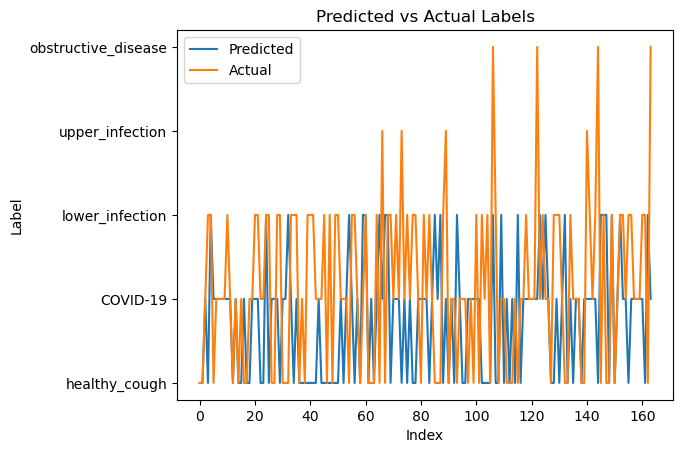

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Reshape the 3D arrays into 2D arrays
num_samples_train, timesteps_train, features_train = X_train_3D.shape
X_train_flattened = X_train_3D.reshape(num_samples_train, timesteps_train * features_train)

num_samples_test, timesteps_test, features_test = X_test_3D.shape
X_test_flattened = X_test_3D.reshape(num_samples_test, timesteps_test * features_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_flattened, y_train)
rf_pred = rf.predict(X_test_flattened)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)

index = range(len(rf_pred))

# Plot the predicted and actual labels
plt.plot(index, rf_pred, label='Predicted')
plt.plot(index, y_test, label='Actual')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Label')
plt.title('Predicted vs Actual Labels')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [79]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.3048780487804878


In [80]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

print("Logistic Regression Accuracy:", logreg_accuracy)


Logistic Regression Accuracy: 0.38414634146341464


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
pip install tensorflow


     -------------------------------------- 272.8/272.8 MB 5.5 MB/s eta 0:00:00
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ---------------------------------------- 1.3/1.3 MB 11.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 4.2/4.2 MB 12.3 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ----------

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Reshape the input features to a 3D shape
X_train_3D = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_3D = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

import numpy as np

# Convert string data to float
X_train_3D = X_train_3D.astype(np.float32)
X_test_3D = X_test_3D.astype(np.float32)

# LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(X_train_3D.shape[1], X_train_3D.shape[2])))
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_3D, y_train, batch_size=32, epochs=10, validation_data=(X_test_3D, y_test))
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_3D, y_test)
print("LSTM Accuracy:", lstm_accuracy)



Random Forest Accuracy: 0.40853658536585363
Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node 'Cast_16' defined at (most recent call last):
    File "C:\Users\Admin\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Admin\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Admin\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\Admin\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Admin\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\Admin\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\Admin\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10072\1630611595.py", line 29, in <module>
      lstm_model.fit(X_train_3D, y_train, batch_size=32, epochs=10, validation_data=(X_test_3D, y_test))
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_16'
Cast string to float is not supported
	 [[{{node Cast_16}}]] [Op:__inference_train_function_7644]

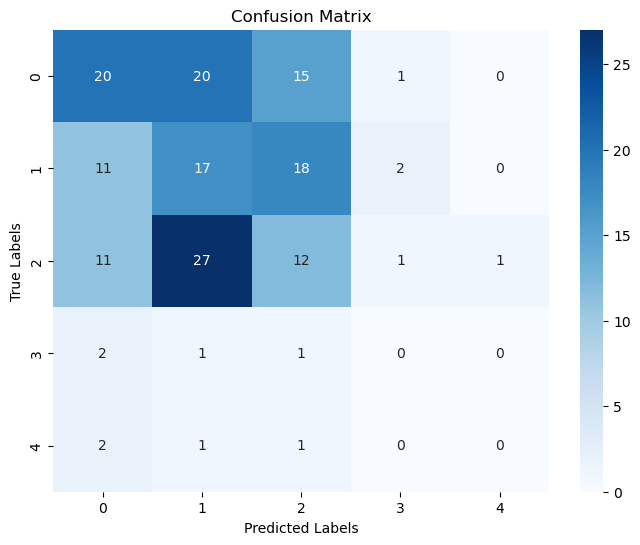

Classification Report:
                     precision    recall  f1-score   support

           COVID-19       0.43      0.36      0.39        56
      healthy_cough       0.26      0.35      0.30        48
    lower_infection       0.26      0.23      0.24        52
obstructive_disease       0.00      0.00      0.00         4
    upper_infection       0.00      0.00      0.00         4

           accuracy                           0.30       164
          macro avg       0.19      0.19      0.19       164
       weighted avg       0.30      0.30      0.30       164



In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation
y_pred = gbm.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


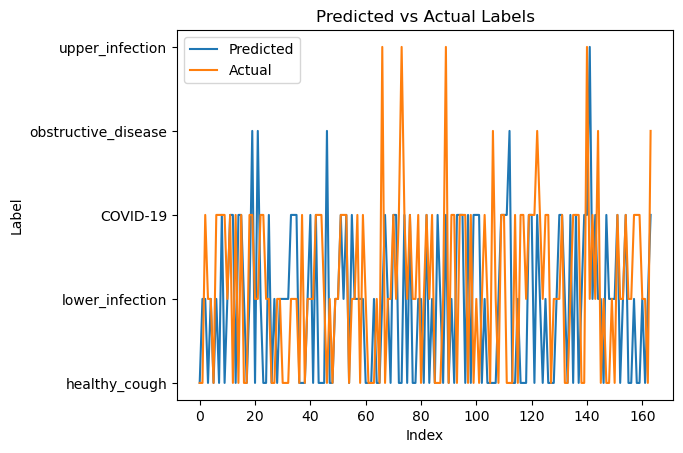

In [75]:
import matplotlib.pyplot as plt

# Create a common index for the x-axis
index = range(len(y_pred))

# Plot the predicted and actual labels
plt.plot(index, y_pred, label='Predicted')
plt.plot(index, y_test, label='Actual')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Label')
plt.title('Predicted vs Actual Labels')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [66]:
# Model evaluation
accuracy = gbm.score(X_test, y_test)
print("Accuracy:", accuracy)



Accuracy: 0.29878048780487804


In [108]:
print("Shape of X_train before reshaping:", X_train.shape)
print("Shape of y:", y.shape)

# Reshape input data to include the channel dimension
X_train = X_train.reshape((*X_train.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))


Shape of X_train before reshaping: (655, 13000, 1)
Shape of y: (819,)


In [102]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Convert the class labels to numerical values
# y_encoded = label_encoder.fit_transform(y)

# # Convert y_encoded to one-hot encoded format
# y_one_hot = to_categorical(y_encoded)

# # Build the model
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(y_one_hot.shape[1], activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [115]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode string labels into integer labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Determine the number of unique classes
num_classes = len(label_encoder.classes_)

# Convert y_train_encoded and y_test_encoded to one-hot encoded format
# Note that the `categorical_crossentropy` loss function requires the labels to be one-hot encoded.
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes)

unique_labels = label_encoder.classes_
print(unique_labels)

# Reshape input data to include the channel dimension
# This is necessary because the `Conv2D` layer expects the input data to have a shape of `(batch_size, width, height, channels)`.
X_train = X_train.reshape(((*X_train.shape, 1)))
X_test = X_test.reshape(((*X_test.shape, 1)))

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(26000, 1, 1, 1, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10, batch_size=32)


['COVID-19' 'healthy_cough' 'lower_infection' 'obstructive_disease'
 'upper_infection']


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_7. Consider increasing the input size. Received input shape [None, 26000, 1, 1, 1, 1, 1] which would produce output shape with a zero or negative value in a dimension.

In [113]:
# Prediction
new_audio = r"C:\Users\Admin\Downloads\public_dataset_v3\diagnosis1234_wav file clean\f67d8450-f76e-4c47-bbbe-85418e320acb.wav"
data, sample_rate = librosa.load(new_audio, sr=None)
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate)
flattened_mfccs = mfccs.flatten()
prediction = gbm.predict([flattened_mfccs])
print("Prediction:", prediction)

ValueError: X has 16660 features, but GradientBoostingClassifier is expecting 13000 features as input.